# 원, 삼각형, 사각형 구분하기
- 어려운 테스트 문제를 기존 CNN 모델로 푸는 경우

In [1]:
from google.colab import files
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape.zip


In [2]:
!unzip hard_handwriting_shape.zip -d hard_handwriting > /dev/null

In [3]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

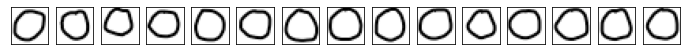

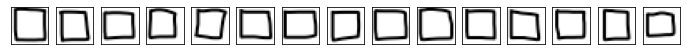

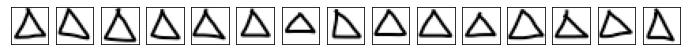

In [4]:
# Train dataset
shapes = ['circle','rectangle','triangle']
for shape in shapes:
    dir_name = f'hard_handwriting/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

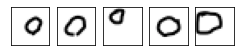

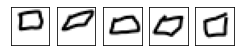

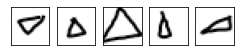

In [5]:
# Test dataset
for shape in shapes:
    dir_name = f'hard_handwriting/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,5,i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

In [6]:
import cv2
cv2.imread('hard_handwriting/train/circle/circle001.png')[:,:,::-1].shape

(24, 24, 3)

- 데이터셋 생성하기

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting/train', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting/test', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


- 모델 정의/설정/학습/평가

In [9]:
import numpy as np
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [11]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [12]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [13]:
model.fit(
    train_data_generator, steps_per_epoch=15, epochs=50,
    validation_data=test_data_generator, validation_steps=5
)

Epoch 1/50
15/15 [==============================] - 1s 30ms/step - loss: 0.9907 - accuracy: 0.5333 - val_loss: 1.2888 - val_accuracy: 0.4000
Epoch 2/50
15/15 [==============================] - 0s 15ms/step - loss: 0.1624 - accuracy: 0.9778 - val_loss: 3.3463 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 4.1935 - val_accuracy: 0.4000
Epoch 4/50
15/15 [==============================] - 0s 15ms/step - loss: 8.7635e-04 - accuracy: 1.0000 - val_loss: 4.6036 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 2.2318e-04 - accuracy: 1.0000 - val_loss: 4.7722 - val_accuracy: 0.4000
Epoch 6/50
15/15 [==============================] - 0s 14ms/step - loss: 1.6280e-04 - accuracy: 1.0000 - val_loss: 4.8709 - val_accuracy: 0.4000
Epoch 7/50
15/15 [==============================] - 0s 15ms/step - loss: 1.4428e-04 - accuracy: 1.0000 - val_loss: 4.9450 - val_accuracy: 0.40

In [14]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 5ms/step - loss: 6.9828 - accuracy: 0.4000


[6.982766628265381, 0.4000000059604645]